In [121]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [122]:
d1 = pd.read_csv("application_test.csv")
d2 = pd.read_csv("application_train.csv")

In [123]:
application_test = d1[['SK_ID_CURR', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL']]
application_train = d2[['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL']]

application = pd.concat([application_test, application_train]).sort_values('SK_ID_CURR')
data = application[application['TARGET'].notna()]
data

,SK_ID_CURR,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,TARGET
0,100002,M,Single / not married,House / apartment,Working,202500.0,1.0
1,100003,F,Married,House / apartment,State servant,270000.0,0.0
2,100004,M,Single / not married,House / apartment,Working,67500.0,0.0
3,100006,F,Civil marriage,House / apartment,Working,135000.0,0.0
4,100007,M,Single / not married,House / apartment,Working,121500.0,0.0
...,...,...,...,...,...,...,...
307506,456251,M,Separated,With parents,Working,157500.0,0.0
307507,456252,F,Widow,House / apartment,Pensioner,72000.0,0.0
307508,456253,F,Separated,House / apartment,Working,153000.0,0.0
307509,456254,F,Married,House / apartment,Commercial associate,171000.0,1.0


# **DEPENDENT = TARGET**

Jumlah banyak data dari setiap target

In [124]:
data['TARGET'].value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

Plot dari jumlah banyak data dari setiap target

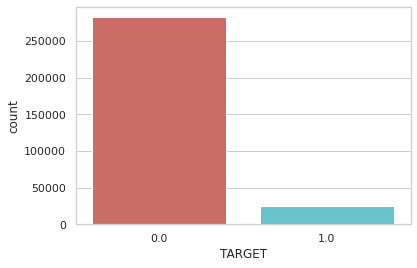

In [125]:
sns.countplot(x = 'TARGET', data = data, palette = 'hls')
plt.show()

Presentase dari setiap target

In [126]:
count_no_difficulties = len(data[data['TARGET'] == 0])
count_difficulties = len(data[data['TARGET'] == 1])

percentage_no_difficulties = count_no_difficulties / (count_no_difficulties + count_difficulties)
percentage_difficulties = count_difficulties / (count_no_difficulties + count_difficulties)

print('percentage_no_difficulties: ', percentage_no_difficulties*100)
print('percentage_difficulties: ', percentage_difficulties*100)

percentage_no_difficulties:  91.92711805431351
percentage_difficulties:  8.072881945686495


Rata-rata penghasilan dari setiap target

In [127]:
data.groupby('TARGET').mean()

,SK_ID_CURR,AMT_INCOME_TOTAL
TARGET,,
0.0,278244.744536,169077.722266
1.0,277449.167936,165611.760906


Rata-rata penghasilan dari setiap jenis pekerjaan

In [128]:
data.groupby(['NAME_INCOME_TYPE', 'TARGET']).mean()

SK_ID_CURR  AMT_INCOME_TOTAL
NAME_INCOME_TYPE     TARGET                                 
Businessman          0.0     275396.900000     652500.000000
Commercial associate 0.0     278336.306609     204147.589265
                     1.0     277961.875933     188217.323228
Maternity leave      0.0     275371.000000     195000.000000
                     1.0     395252.500000      58500.000000
Pensioner            0.0     278624.989233     136449.361318
                     1.0     276069.449698     135556.940644
State servant        0.0     279078.158453     180655.430487
                     1.0     276118.368295     164713.352282
Student              0.0     257344.777778     170500.000000
Unemployed           0.0     252139.214286     132557.142857
                     1.0     258495.625000      72000.000000
Working              0.0     277950.410038     163116.124371
                     1.0     277642.572780     163676.848266

Plot dari rata-rata setiap target berdasarkan jenis pekerjaan

Text(0, 0.5, 'Mean Amount Income Total')

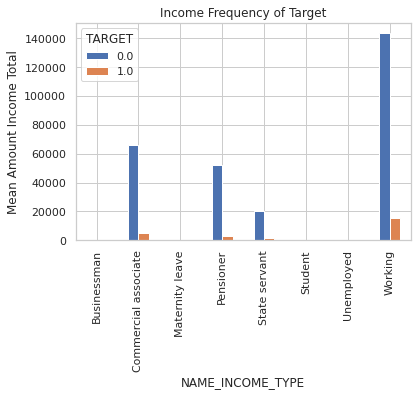

In [129]:
pd.crosstab(data['NAME_INCOME_TYPE'], data['TARGET']).plot(kind = 'bar')
plt.title('Income Frequency of Target')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Mean Amount Income Total')

# **DEPENDENT - CODE GENDER**

jumlah banyak data dari setiap gender

In [130]:
data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Menghapus CODE_GENDER = XNA 

In [131]:
data[data['CODE_GENDER'].str.contains('XNA')]
data.replace('XNA', np.nan, inplace = True)
data1 = data[data['CODE_GENDER'].notna()]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Plot dari jumlah banyak data dari setiap gender

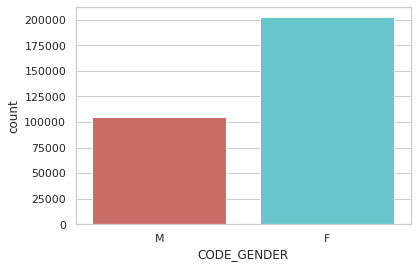

In [132]:
sns.countplot(x = 'CODE_GENDER', data = data, palette = 'hls')
plt.show()

Presentase dari setiap gender

In [133]:
count_M = len(data[data['CODE_GENDER'] == 'M'])
count_F = len(data[data['CODE_GENDER'] == 'F'])

percentage_count_M = count_M / (count_M + count_F)
percentage_count_F = count_F / (count_M + count_F)

print('percentage_count_M: ', percentage_count_M*100)
print('percentage_count_F: ', percentage_count_F*100)

percentage_count_M:  34.16475072112179
percentage_count_F:  65.83524927887821


Rata-rata penghasilan dari setiap gender

In [134]:
data.groupby('CODE_GENDER').mean()

,SK_ID_CURR,AMT_INCOME_TOTAL,TARGET
CODE_GENDER,,,
F,278235.964094,156032.309247,0.069993
M,278076.627828,193396.482153,0.101419


Rata-rata penghasilan dari setiap jenis pekerjaan

In [135]:
data.groupby(['NAME_INCOME_TYPE', 'CODE_GENDER']).mean()

SK_ID_CURR  AMT_INCOME_TOTAL    TARGET
NAME_INCOME_TYPE     CODE_GENDER                                           
Businessman          F            371658.333333     555000.000000  0.000000
                     M            234142.000000     694285.714286  0.000000
Commercial associate F            278417.612076     186271.446774  0.066668
                     M            278127.127357     230364.454941  0.088275
Maternity leave      F            364983.250000      85500.000000  0.500000
                     M            156685.000000     360000.000000  0.000000
Pensioner            F            278700.155388     133974.328769  0.049557
                     M            277533.739432     147276.135869  0.073161
State servant        F            279256.513812     165967.515497  0.053418
                     M            277962.239097     217080.934918  0.068753
Student              F            247771.142857     199928.571429  0.000000
                     M            263437.090909     151772.727273  0.000000
Unemployed           F            246227.235294     111017.647059  0.352941
                     M            282410.200000     108900.000000  0.400000
Working              F            277769.465102     150805.670362  0.083735
                     M            278162.971786     182473.187742  0.114857

Plot dari rata-rata penghasilan dari setiap gender berdasarkan jenis pekerjaan

Text(0, 0.5, 'Mean Amount Income Total')

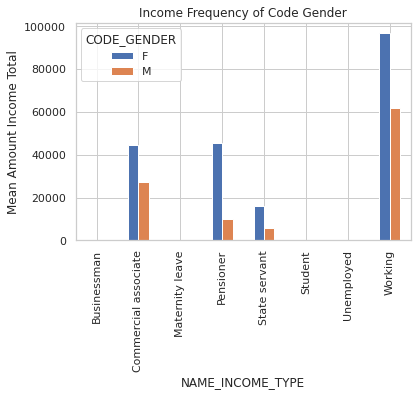

In [136]:
pd.crosstab(data['NAME_INCOME_TYPE'], data['CODE_GENDER']).plot(kind = 'bar')
plt.title('Income Frequency of Code Gender')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Mean Amount Income Total')

# **DEPENDENT = FAMILY STATUS**

Jumlah banyak data dari setiap family status

In [137]:
data['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Menghapus nilai unknown pada family status

In [138]:
data[data['NAME_FAMILY_STATUS'].str.contains('Unknown')]
data.replace('Unknown', np.nan, inplace = True)
data1 = data[data['NAME_FAMILY_STATUS'].notna()]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Plot dari jumlah data dari setiap family status

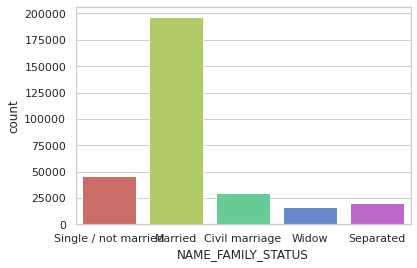

In [139]:
sns.countplot(x = 'NAME_FAMILY_STATUS', data = data, palette = 'hls')
plt.show()

Rata-rata penghasilan dari setiap family status

In [140]:
data.groupby('NAME_FAMILY_STATUS').mean()

,SK_ID_CURR,AMT_INCOME_TOTAL,TARGET
NAME_FAMILY_STATUS,,,
Civil marriage,278269.849605,167840.534651,0.099446
Married,277874.469027,171012.354904,0.075599
Separated,278947.553111,171231.793475,0.081942
Single / not married,279023.364735,167919.870329,0.098077
Widow,278434.253978,143001.647132,0.058242


Rata-rata penghasilan dari setiap family status berdasarkan jenis pekerjaan

In [141]:
data.groupby(['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS']).mean()

SK_ID_CURR  AMT_INCOME_TOTAL  \
NAME_INCOME_TYPE     NAME_FAMILY_STATUS                                      
Businessman          Civil marriage        372723.000000     540000.000000   
                     Married               260948.285714     630000.000000   
                     Single / not married  277304.000000     787500.000000   
Commercial associate Civil marriage        277361.763250     197099.185801   
                     Married               278207.875201     205804.012558   
                     Separated             278543.773859     204642.310447   
                     Single / not married  279346.986353     196962.250598   
                     Widow                 277197.308869     191361.961651   
Maternity leave      Married               323323.600000     140400.000000   
Pensioner            Civil marriage        280375.258317     141889.125105   
                     Married               277173.649411     137725.115978   
                     Separated             281706.543357     141278.708831   
                     Single / not married  280799.011757     136413.559193   
                     Widow                 279517.293635     127750.405082   
State servant        Civil marriage        279784.878077     178487.426102   
                     Married               278454.978097     178703.791807   
                     Separated             278142.712711     186921.029758   
                     Single / not married  281019.086535     183459.527289   
                     Widow                 279584.951289     176403.455587   
Student              Civil marriage        286391.250000     132750.000000   
                     Married               233674.000000     154500.000000   
                     Separated             331123.000000     562500.000000   
                     Single / not married  263113.000000     146250.000000   
Unemployed           Civil marriage        268748.333333     102000.000000   
                     Married               313097.600000      83250.000000   
                     Separated             336749.000000      54000.000000   
                     Single / not married  157665.200000     195750.000000   
                     Widow                 178539.333333      86850.000000   
Working              Civil marriage        278074.436865     158777.087678   
                     Married               277862.678717     165022.337556   
                     Separated             278196.310922     165265.111595   
                     Single / not married  278211.472187     159396.111362   
                     Widow                 276458.739309     152337.635605   

                                             TARGET  
NAME_INCOME_TYPE     NAME_FAMILY_STATUS              
Businessman          Civil marriage        0.000000  
                     Married               0.000000  
                     Single / not married  0.000000  
Commercial associate Civil marriage        0.088376  
                     Married               0.069204  
                     Separated             0.073397  
                     Single / not married  0.090463  
                     Widow                 0.055046  
Maternity leave      Married               0.400000  
Pensioner            Civil marriage        0.063461  
                     Married               0.050906  
                     Separated             0.060461  
                     Single / not married  0.055029  
                     Widow                 0.057042  
State servant        Civil marriage        0.076131  
                     Married               0.054129  
                     Separated             0.054372  
                     Single / not married  0.067864  
                     Widow                 0.050143  
Student              Civil marriage        0.000000  
                     Married               0.000000  
                     Separated             0.000000  
                   

Text(0, 0.5, 'Mean Amount Income Total')

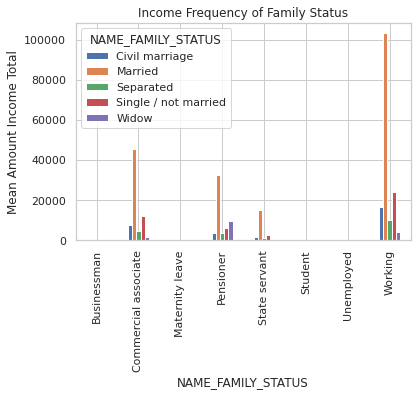

In [142]:
pd.crosstab(data['NAME_INCOME_TYPE'], data['NAME_FAMILY_STATUS']).plot(kind = 'bar')
plt.title('Income Frequency of Family Status')
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Mean Amount Income Total')

# **DEPENDENT = HOUSING TYPE**

Jumlah banyak data dari setiap housing type

In [143]:
data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

Plot dari jumlah banyak data dari setiap housing type

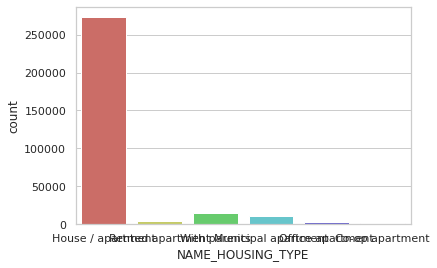

In [144]:
sns.countplot(x = 'NAME_HOUSING_TYPE', data = data, palette = 'hls')
plt.show()

Rata-rata penghasilan dari setiap housing type

In [145]:
data.groupby('NAME_HOUSING_TYPE').mean()

,SK_ID_CURR,AMT_INCOME_TOTAL,TARGET
NAME_HOUSING_TYPE,,,
Co-op apartment,278765.719251,167651.322193,0.079323
House / apartment,278111.896254,169227.717311,0.077957
Municipal apartment,277890.198694,168002.934007,0.085397
Office apartment,278482.433703,187906.542988,0.065724
Rented apartment,281031.256915,167460.213891,0.123131
With parents,278625.958086,158651.069555,0.116981


Rata-rata penghasilan dari setiap housing type

In [146]:
data.groupby(['NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE']).mean()

SK_ID_CURR  AMT_INCOME_TOTAL  \
NAME_INCOME_TYPE     NAME_HOUSING_TYPE                                      
Businessman          House / apartment    275396.900000     652500.000000   
Commercial associate Co-op apartment      273999.308475     194705.740678   
                     House / apartment    278083.061323     204859.081989   
                     Municipal apartment  280681.114051     200601.966083   
                     Office apartment     278938.208661     209573.893701   
                     Rented apartment     283287.129154     189400.901057   
                     With parents         278823.258646     179566.189764   
Maternity leave      House / apartment    323323.600000     140400.000000   
Pensioner            Co-op apartment      295276.327586     135221.120690   
                     House / apartment    278527.215056     136252.297818   
                     Municipal apartment  275717.681200     136384.010549   
                     Office apartment     278247.512658     150093.071203   
                     Rented apartment     288303.789216     151763.426471   
                     With parents         278231.652778     138795.583333   
State servant        Co-op apartment      291682.345238     167619.642857   
                     House / apartment    279280.511503     178731.815584   
                     Municipal apartment  270574.728240     189369.940039   
                     Office apartment     278674.288931     224618.259850   
                     Rented apartment     286565.099315     185606.830479   
                     With parents         277544.300090     165528.923612   
Student              House / apartment    275091.923077     175500.000000   
                     Office apartment     292175.000000     123750.000000   
                     Rented apartment     176024.500000     202500.000000   
                     With parents         119612.000000     135000.000000   
Unemployed           House / apartment    238854.764706     107576.470588   
                     Municipal apartment  343054.000000      63000.000000   
                     Rented apartment     148306.000000     270000.000000   
                     With parents         348674.333333      90000.000000   
Working              Co-op apartment      276223.237640     160926.459330   
                     House / apartment    277815.496449     164282.185218   
                     Municipal apartment  278761.351463     160124.366748   
                     Office apartment     278254.339428     173203.054054   
                     Rented apartment     279153.063767     157218.632276   
                     With parents         278671.464738     149182.486868   

                                            TARGET  
NAME_INCOME_TYPE     NAME_HOUSING_TYPE              
Businessman          House / apartment    0.000000  
Commercial associate Co-op apartment      0.088136  
                     House / apartment    0.072040  
                     Municipal apartment  0.080880  
                     Office apartment     0.074803  
                     Rented apartment     0.115559  
                     With parents         0.099610  
Maternity leave      House / apartment    0.400000  
Pensioner            Co-op apartment      0.043103  
                     House / apartment    0.053344  
                     Municipal apartment  0.065635  
                     Office apartment     0.060127  
                     Rented apartment     0.068627  
                     With parents         0.046296  
State servant        Co-op apartment      0.011905  
                     House / apartment    0.055880  
                     Municipal apartment  0.060928  
                     Office apartment     0.037523  
                     Rented apartment     0.065068  
                     With parents         0.093441  
Student              House / apartment    0.000000  
                     Office apartment     0.000000  


Text(0, 0.5, 'Mean Amount Income Total')

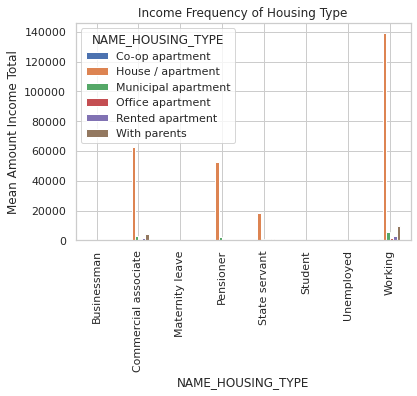

In [147]:
pd.crosstab(data['NAME_INCOME_TYPE'], data['NAME_HOUSING_TYPE']).plot(kind = 'bar')
plt.title('Income Frequency of Housing Type')
plt.xlabel('NAME_HOUSING_TYPE')
plt.ylabel('Mean Amount Income Total')

Mengidentifikasikan nilai dummies

In [148]:
data_final = pd.get_dummies(data)
data_final.columns.values

array(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'TARGET', 'CODE_GENDER_F',
       'CODE_GENDER_M', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment',
       'NAME_HOUSING_TYPE_With parents', 'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working'],
      dtype=object)

# **LOGISTIC REGRESSION**

In [150]:
X = data_final.loc[:, data_final.columns != 'TARGET']
y = data_final.loc[:, data_final.columns == 'TARGET']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
X_train = np.array(X_train)
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TARGET'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['TARGET']==0]))
print("Number of subscription",len(os_data_y[os_data_y['TARGET']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==1])/len(os_data_X))

length of oversampled data is  395544
Number of no subscription in oversampled data 197772
Number of subscription 197772
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [151]:
data_final_vars=data_final.columns.values.tolist()
y=['TARGET']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True False False  True False
 False False  True False False False  True False False False  True]
[ 1  1  1  1  1  1  8  1  3 10  1  6  7  5  1 12  4 13  1  2 11  9  1]


In [164]:
X

,SK_ID_CURR,AMT_INCOME_TOTAL,CODE_GENDER_F,CODE_GENDER_M,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working
0,245635.000000,153000.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.0,0.000000
1,159635.000000,427500.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.0,0.000000
2,420342.000000,135000.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.0,1.000000
3,383056.000000,270000.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.0,0.000000
4,213786.000000,180000.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
395539,240177.386699,135000.0,0.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.0,1.000000
395540,205791.691606,202500.0,0.512897,0.487103,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.512897
395541,423962.335510,225000.0,0.000000,1.000000,0.945724,0.054276,0.945724,0.0,0.000000,0.0,1.000000
395542,160138.482576,270000.0,0.689784,0.310216,0.000000,0.310216,1.000000,0.0,0.689784,0.0,0.310216


In [152]:
cols=['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_FAMILY_STATUS_Married', 
      'NAME_FAMILY_STATUS_Single / not married', 'NAME_HOUSING_TYPE_House / apartment', 
      'NAME_HOUSING_TYPE_With parents', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 
      'NAME_INCOME_TYPE_Working']
X=os_data_X[cols]
y=os_data_y['TARGET']

In [153]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.677048
         Iterations 6
                                     Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.023      
Dependent Variable:         TARGET                  AIC:                     535626.3751
Date:                       2022-07-31 09:41        BIC:                     535746.1433
No. Observations:           395544                  Log-Likelihood:          -2.6780e+05
Df Model:                   10                      LL-Null:                 -2.7417e+05
Df Residuals:               395533                  LLR p-value:             0.0000     
Converged:                  1.0000                  Scale:                   1.0000     
No. Iterations:             6.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
logreg

LogisticRegression()

In [161]:
y_pred = logreg.predict(X_test)
print('Akurasi pengklasifikasi regresi logistik pada set tes: {:.2f}'.format(logreg.score(X_test, y_test)))

Akurasi pengklasifikasi regresi logistik pada set tes: 0.51


In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[30467 29234]
 [29148 29815]]


Hasil matriks di atas menunjukkan bahwa kita mempunya 30467+29815 merupakan prediksi yang benar dan 29234+29148 merupakan prediksi yang salah 

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51     59701
         1.0       0.50      0.51      0.51     58963

    accuracy                           0.51    118664
   macro avg       0.51      0.51      0.51    118664
weighted avg       0.51      0.51      0.51    118664



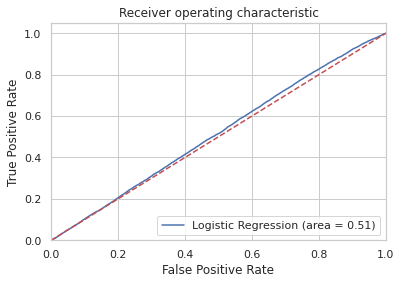

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()